# Preparation
Import Library

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import os
import shutil

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from imageio import imread
from skimage.transform import resize
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

ModuleNotFoundError: No module named 'imageio'

## Data Path

Tải dữ liệu đã xử lý sẵn trên Google Drive

In [4]:
import os
project_dir = 'Project 1 - CV - Animal Image Classification/'
filter_path = project_dir + 'filtered-name/'
image_path = project_dir + 'animals/'
os.makedirs(image_path, exist_ok=True)

Downloading...
From (original): https://drive.google.com/uc?id=19Rr-b09YUjcmgc6_mJyTZHSOsr-ZPNNP
From (redirected): https://drive.google.com/uc?id=19Rr-b09YUjcmgc6_mJyTZHSOsr-ZPNNP&confirm=t&uuid=1eb69245-1b92-4db6-b884-43185845ec88
To: e:\Computer Science\Research\AI4E\Project 1 - CV - Animal Image Classification\animals.zip
100%|██████████| 193M/193M [00:51<00:00, 3.73MB/s] 


In [33]:
folders = [f for f in os.listdir(filter_path) if os.path.isdir(os.path.join(filter_path, f))]
for folder in folders: print(folder, end = ' ')

Downloading...
From: https://drive.google.com/uc?id=1qjjNwm0uISSAWp8AtLfHKqM4pAl_6kVZ
To: e:\Computer Science\Research\AI4E\filtered.zip

  0%|          | 0.00/20.4k [00:00<?, ?B/s]
100%|██████████| 20.4k/20.4k [00:00<00:00, 317kB/s]


african_elephant alpaca american_bison anteater arctic_fox armadillo baboon badger blue_whale brown_bear camel dolphin giraffe groundhog highland_cattle horse jackal kangaroo koala manatee mongoose mountain_goat opossum orangutan otter polar_bear porcupine red_panda rhinoceros seal sea_lion snow_leopard squirrel sugar_glider tapir vampire_bat vicuna walrus warthog water_buffalo weasel wildebeest wombat yak zebra 

In [35]:
for folder in folders:
  file_path = f'{filter_path}/{folder}/filtered-name.txt'

  with open(file_path, 'r') as file:
    for line in file:
      img = line.strip()
      path_img = f'{image_path}/{folder}/{img}'
      if os.path.exists(path_img):
        os.remove(path_img)
      else:
        print(f"{path_img} del-ed", end=" | ")

## Load data

In [7]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import SGD
from sklearn.model_selection import train_test_split
import numpy as np
import os

datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    validation_split=0.2
)

train_generator = datagen.flow_from_directory(
    image_path,
    target_size=(224, 224),
    batch_size=512,
    class_mode='categorical',
    subset='training'
)

validation_generator = datagen.flow_from_directory(
    image_path,
    target_size=(224, 224),
    batch_size=512,
    class_mode='categorical',
    subset='validation'
)

KeyboardInterrupt: 

# Khởi tạo mô hình + TN1
Thí nghiệm 1: Chạy các mô hình trên bộ ảnh chưa augment

## Helpers

In [2]:
# import wandb
# from wandb.integration.keras import WandbCallback
# wandb.init(project="animals-classifier", entity="letangphuquy4-vietnam-korea-university-of-information-an")
def WandbCallback(): pass

Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Currently logged in as: letangphuquy4 (letangphuquy4-vietnam-korea-university-of-information-an). Use `wandb login --relogin` to force relogin


In [18]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import AdamW
import datetime

from matplotlib import pyplot as plt
import json

def plot_learning_curve(history_dict, name=''):
  plt.figure(figsize=(12, 6))

  plt.subplot(1, 2, 1)
  plt.plot(history_dict['loss'], label='Train Loss')
  plt.plot(history_dict['val_loss'], label='Validation Loss')
  plt.title('Loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend()

  plt.subplot(1, 2, 2)
  plt.plot(history_dict['accuracy'], label='Train Accuracy')
  plt.plot(history_dict['val_accuracy'], label='Validation Accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend()

  plt.tight_layout()
  if name == '': name = datetime.datetime.now().strftime('%b-%d %H_%M_%S')
  plt.savefig(f'{name}')
  plt.show()

model_path = f'{project_dir}/model and history'
def save_model(model, history_dict, name):
  plot_learning_curve(history_dict, name)
  model.save(f'{model_path}/{name}.h5')
  with open(f'{model_path}/history_{name}.json', 'w') as f:
    json.dump(history_dict, f)

## CNN

 CNN model

In [20]:
import tensorflow as tf
from tensorflow.keras import layers, models

def create_cnn_model():
    cnn_model = models.Sequential()
    cnn_model.add(layers.Conv2D(16, (7, 7), padding='same', activation='relu', input_shape=(224, 224, 3)))
    cnn_model.add(layers.BatchNormalization())
    cnn_model.add(layers.MaxPooling2D((2, 2)))
    cnn_model.add(layers.Conv2D(32, (5, 5), padding='same', activation='relu'))
    cnn_model.add(layers.MaxPooling2D((2, 2)))
    cnn_model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
    cnn_model.add(layers.MaxPooling2D((2, 2)))
    cnn_model.add(layers.Flatten())

    cnn_model.add(layers.Dense(1352, activation='relu'))
    cnn_model.add(layers.Dropout(0.2))
    cnn_model.add(layers.Dense(45, activation='softmax'))

    cnn_model.compile(optimizer=AdamW(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])
    return cnn_model

cnn_model = create_cnn_model()
cnn_model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 224, 224, 16)        │           2,368 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 224, 224, 16)        │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 112, 112, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 112, 112, 32)        │          12,832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 56, 56, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 56, 56, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 28, 28, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 50176)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1352)                │      67,839,304 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 1352)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 45)                  │          60,885 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 67,933,949 (259.15 MB)

 Trainable params: 67,933,917 (259.15 MB)

 Non-trainable params: 32 (128.00 B)

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10, mode='min')
CNN_History = cnn_model.fit(train_generator, epochs=30, validation_data=validation_generator, callbacks=[ early_stopping])

Epoch 1/30
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 34s/step - accuracy: 0.1161 - loss: 3.6011 

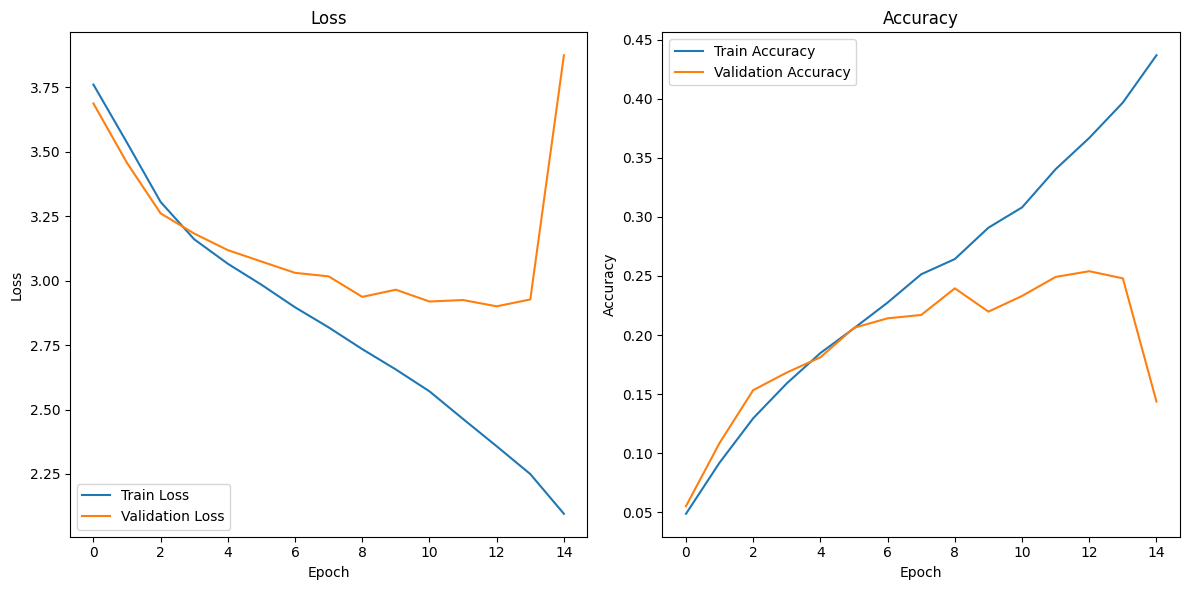

In [ ]:
hist = CNN_History.history
# plot_learning_curve(hist)
save_model(cnn_model, hist, 'CNN_aug=0')

## VGG16

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import SGD

def create_vgg16_model():
    vgg16_base = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

    for layer in vgg16_base.layers: layer.trainable = False

    vgg_model = models.Sequential([
        vgg16_base,
        layers.Flatten(),
        layers.Dense(512, activation='relu'),
        layers.Dense(45, activation='softmax')
    ])

    vgg_model.compile(optimizer=AdamW(learning_rate=1e-3),
              loss='categorical_crossentropy',
              metrics=['accuracy'])
    return vgg_model

vgg_model = create_vgg16_model()
vgg_model.summary()

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, mode='min')
VGG16_hist = vgg_model.fit(train_generator, epochs=30, validation_data=validation_generator, callbacks=[early_stopping])

Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


314/314 ━━━━━━━━━━━━━━━━━━━━ 72s 179ms/step - accuracy: 0.0807 - loss: 3.6823 - val_accuracy: 0.2564 - val_loss: 3.0968
Epoch 2/30
314/314 ━━━━━━━━━━━━━━━━━━━━ 43s 134ms/step - accuracy: 0.3128 - loss: 2.8522 - val_accuracy: 0.3937 - val_loss: 2.5289
Epoch 3/30
314/314 ━━━━━━━━━━━━━━━━━━━━ 42s 131ms/step - accuracy: 0.4557 - loss: 2.3072 - val_accuracy: 0.4670 - val_loss: 2.1953
Epoch 4/30
314/314 ━━━━━━━━━━━━━━━━━━━━ 42s 132ms/step - accuracy: 0.5338 - loss: 1.9538 - val_accuracy: 0.4988 - val_loss: 1.9763
Epoch 5/30
314/314 ━━━━━━━━━━━━━━━━━━━━ 43s 133ms/step - accuracy: 0.5965 - loss: 1.7080 - val_accuracy: 0.5596 - val_loss: 1.7999
Epoch 6/30
314/314 ━━━━━━━━━━━━━━━━━━━━ 42s 132ms/step - accuracy: 0.6420 - loss: 1.5402 - val_accuracy: 0.5733 - val_loss: 1.6817
Epoch 7/30
314/314 ━━━━━━━━━━━━━━━━━━━━ 44s 136ms/step - accuracy: 0.6797 - loss: 1.3758 - val_accuracy: 0.5866 - val_loss: 1.6024
Epoch 8/30
314/314 ━━━━━━━━━━━━━━━━━━━━ 42s 131ms/step - accuracy: 0.6967 - loss: 1.2820 - val

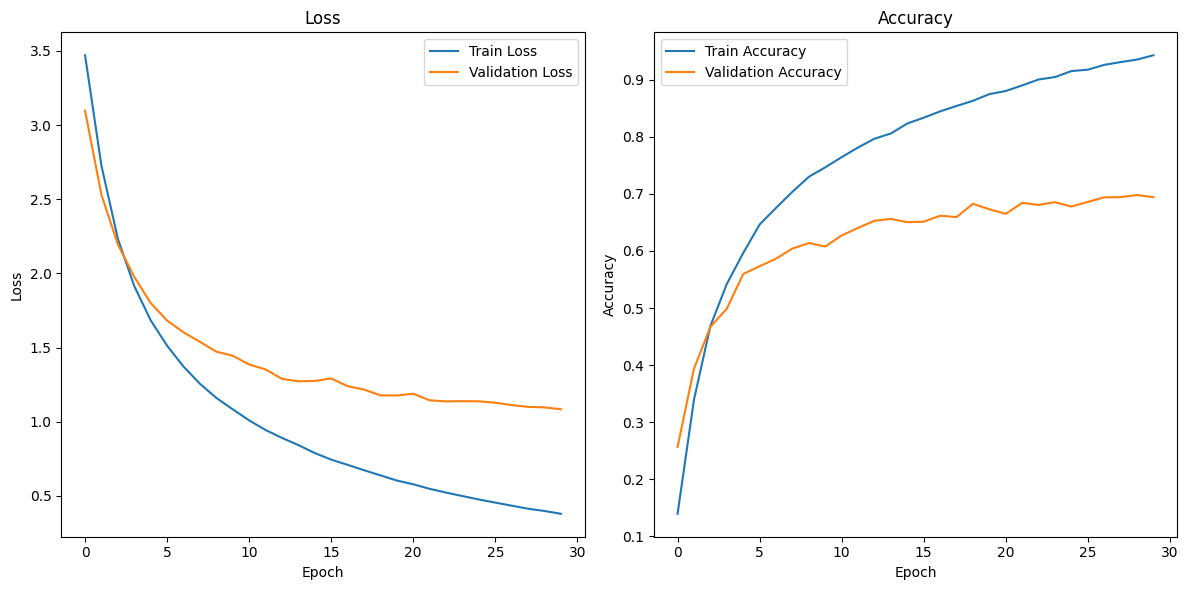

In [ ]:
hist = VGG16_hist.history
# plot_learning_curve(hist)
save_model(vgg_model, hist, 'VGG16_frozen_aug=0')

In [ ]:
# Mở khóa các lớp mô hình để fine-tuning
for layer in vgg_model.layers[0].layers: layer.trainable = True
vgg_model.compile(optimizer=AdamW(learning_rate=1e-4),
              loss='categorical_crossentropy',
              metrics=['accuracy'])
VGG16_hist_fine_tuning = vgg_model.fit(train_generator, epochs=10, validation_data=validation_generator, callbacks=[early_stopping])

Epoch 1/10
314/314 ━━━━━━━━━━━━━━━━━━━━ 123s 298ms/step - accuracy: 0.9525 - loss: 0.3172 - val_accuracy: 0.7198 - val_loss: 0.9885
Epoch 2/10
314/314 ━━━━━━━━━━━━━━━━━━━━ 88s 278ms/step - accuracy: 0.9550 - loss: 0.2615 - val_accuracy: 0.7230 - val_loss: 0.9719
Epoch 3/10
314/314 ━━━━━━━━━━━━━━━━━━━━ 88s 277ms/step - accuracy: 0.9574 - loss: 0.2398 - val_accuracy: 0.7246 - val_loss: 0.9664
Epoch 4/10
314/314 ━━━━━━━━━━━━━━━━━━━━ 88s 279ms/step - accuracy: 0.9582 - loss: 0.2224 - val_accuracy: 0.7267 - val_loss: 0.9653
Epoch 5/10
314/314 ━━━━━━━━━━━━━━━━━━━━ 88s 278ms/step - accuracy: 0.9573 - loss: 0.2139 - val_accuracy: 0.7250 - val_loss: 0.9656
Epoch 6/10
314/314 ━━━━━━━━━━━━━━━━━━━━ 88s 276ms/step - accuracy: 0.9575 - loss: 0.2104 - val_accuracy: 0.7238 - val_loss: 0.9683
Epoch 7/10
314/314 ━━━━━━━━━━━━━━━━━━━━ 88s 279ms/step - accuracy: 0.9573 - loss: 0.1997 - val_accuracy: 0.7234 - val_loss: 0.9703
Epoch 8/10
314/314 ━━━━━━━━━━━━━━━━━━━━ 87s 275ms/step - accuracy: 0.9632 - loss: 

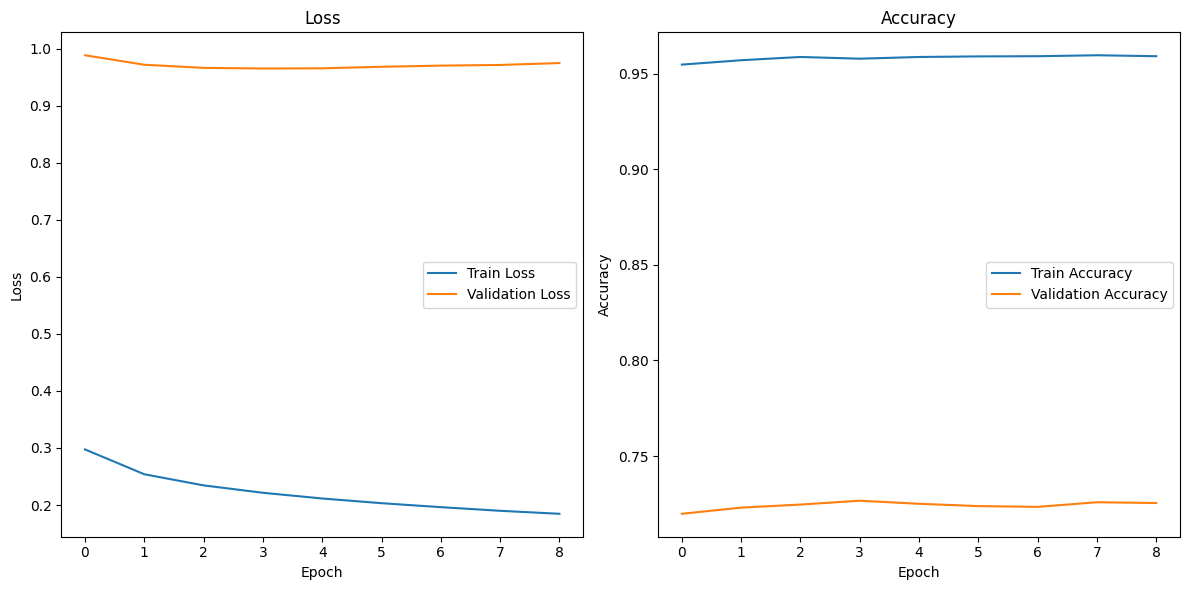

In [ ]:
hist = VGG16_hist_fine_tuning.history
# plot_learning_curve(hist)
save_model(vgg_model, hist, 'VGG16_aug=0')

# Thí nghiệm 1: Xét độ hiệu quả của phép augment data

## Load data with augmentation

In [ ]:
datagen = ImageDataGenerator(
    validation_split=0.2,
    rescale=1.0/255.0,
    rotation_range=45,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='reflect'
)

train_generator = datagen.flow_from_directory(
    image_path,
    target_size=(224, 224),
    batch_size=512,
    class_mode='categorical',
    subset='training'
)

validation_generator = datagen.flow_from_directory(
    image_path,
    target_size=(224, 224),
    batch_size=512,
    class_mode='categorical',
    subset='validation'
)

## Run CNN and VGG on augmented data

In [ ]:
cnn_model = create_cnn_model()
early_stopping = EarlyStopping(monitor='val_loss', patience=10, mode='min')
CNN_History = cnn_model.fit(train_generator, epochs=30, validation_data=validation_generator, callbacks=[early_stopping])

In [ ]:
hist = CNN_History.history
# plot_learning_curve(hist)
save_model(cnn_model, hist, 'CNN_aug=1')

In [ ]:
vgg_model = create_vgg16_model()
early_stopping = EarlyStopping(monitor='val_loss', patience=5, mode='min')
vgg_model.fit(train_generator, epochs=30, validation_data=validation_generator, callbacks=[early_stopping])
for layer in vgg_model.layers[0].layers: layer.trainable = True
vgg_model.compile(optimizer=AdamW(learning_rate=1e-4),
              loss='categorical_crossentropy',
              metrics=['accuracy'])
VGG16_hist = vgg_model.fit(train_generator, epochs=10, validation_data=validation_generator, callbacks=[early_stopping])

In [ ]:
hist = VGG16_hist.history
# plot_learning_curve(hist)
save_model(vgg_model, hist, 'VGG16_aug=1')